In [2]:
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('drive/My Drive/20210401/TDI_Milestone/Value_of_Energy_Cost_Savings_Program_Savings_for_Businesses_-_FY2020.csv') 
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Company Name,company contact,company email,company phone,Address,City,State,Postcode,Industry,Industry descr,...,Savings from beginning receiving benefits,Borough,Latitude,Longitude,Community Board,Council District,Census Tract,BIN,BBL,NTA
0,1 State Street,David Neiburg,eskoblo@energyspec.com,7186779077,1114 Avenue J,Brooklyn,NY,11230,Commercial,35 story building,...,349.78,Brooklyn,40.624784,-73.964920,314.0,44.0,534.0,3179818.0,3.067130e+09,Midwood
1,100 Church LLC,Edward A. Carroll,NaN,2125663000,100 Church Street,NY,NY,10007,Commercial,21 Floors,...,4423698.05,New York,40.712968,-74.009490,101.0,1.0,21.0,1001409.0,1.001250e+09,SoHo-TriBeCa-Civic Center-Little Italy
2,100 Wall Investments,Jerry Branam,NaN,2122487160,96 Wall Street,New York,NY,10005,Landlord,NaN,...,1814542.62,New York,40.705052,-74.007199,101.0,1.0,7.0,1000875.0,1.000380e+09,Battery Park City-Lower Manhattan
3,1-10 Bush Terminal Owner LP,Andrew Kimball,akimball@industrycity.com,3474178429,"220 36th St, Suite 2A",Brooklyn,NY,11232,Landlord,Special Eligible Premises for eligible businesses,...,6755.31,Brooklyn,40.656061,-74.007334,307.0,38.0,2.0,3398687.0,3.006950e+09,Sunset Park West
4,"120 Broadway Acquisitions JV, LLC (Ldmk)",Carl Letich,clettich@silvprop.com,2124064020,120 Broadway,New York,NY,10271,Commercial,NaN,...,3293055.08,New York,40.708546,-74.011041,101.0,1.0,7.0,1001026.0,1.000478e+09,Battery Park City-Lower Manhattan


In [4]:
df.columns

Index(['Company Name', 'company contact', 'company email', 'company phone',
       'Address', 'City', 'State', 'Postcode', 'Industry', 'Industry descr',
       'Company Type', 'Current fulltime', 'Job created', 'Job retain',
       'Effective Date', 'Total Savings',
       'Savings from beginning receiving benefits', 'Borough', 'Latitude',
       'Longitude', 'Community Board', 'Council District', 'Census Tract',
       'BIN', 'BBL', 'NTA'],
      dtype='object')

In [14]:
# How many different companies are represented in the data set?
df['Company Name'].dropna().nunique()

439

In [10]:
# What is the total number of jobs created for businesses in Queens?
len(df['Borough']=='Queens')

450

In [15]:
# How many different unique email domains names are there in the data set?
domain = df['company email'].str.split('@').str[1]
domain.dropna().nunique()

356

In [63]:
# Considering only NTAs with at least 5 listed businesses, what is the average total savings and the total jobs created for each NTA?
df1 = df.groupby("NTA")["Savings from beginning receiving benefits"].agg(['count', 'sum'])
df2 = df.groupby("NTA")["Job created"].agg('sum')
df3 = df1.merge(df2, right_index=True, left_index=True)

#df1['count'] == 3
df4 = df3.loc[df3['count'] >= 5]
df4['average_saving'] = df4['sum']/df4['count']
df4
#df2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,count,sum,Job created,average_saving
NTA,,,,
Battery Park City-Lower Manhattan,9,34183361.15,0.0,3.798151e+06
Bushwick South,10,3078000.31,10.0,3.078000e+05
Carroll Gardens-Columbia Street-Red Hook,11,2031523.40,0.0,1.846839e+05
College Point,7,4019755.66,2.0,5.742508e+05
Crown Heights North,9,154520.70,0.0,1.716897e+04
DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill,10,4373905.00,0.0,4.373905e+05
East New York,9,4121508.61,15.0,4.579454e+05
East Williamsburg,11,1577064.27,0.0,1.433695e+05
Greenpoint,14,2481108.82,0.0,1.772221e+05


In [64]:
# Save your result for the previous question as a CSV file.
df4.to_csv('drive/My Drive/20210401/TDI_Milestone/result.csv')

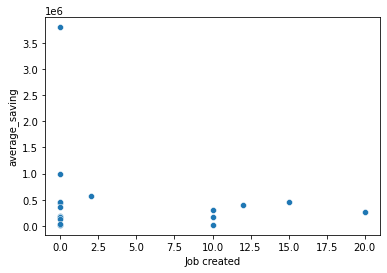

In [71]:
# scatter plot of jobs created versus average savings. Use both a standard and a logarithmic scale for the average savings.
import seaborn as sns
sns.scatterplot(data=df4, x="Job created", y="average_saving")


[None]

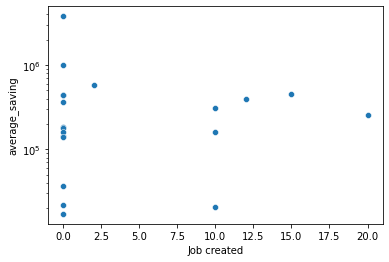

In [73]:
splot = sns.scatterplot(data=df4, x="Job created", y="average_saving")
splot.set(yscale="log")

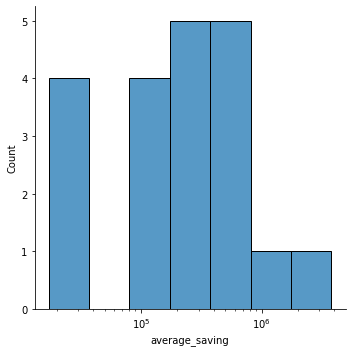

In [75]:
# histogram of the log of the average total savings.
sns.displot(df4, x="average_saving",log_scale=True)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29],
 <a list of 30 Text major ticklabel objects>)

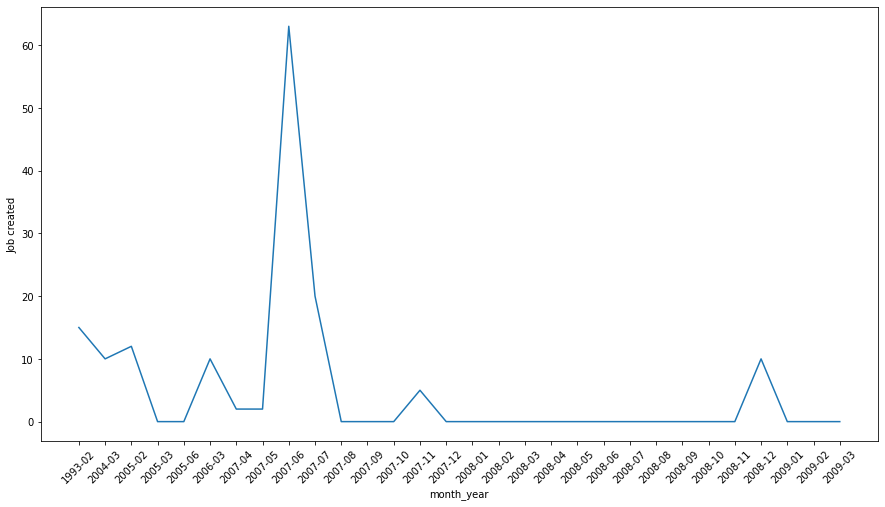

In [132]:
# line plot of the total jobs created for each month.
import matplotlib.pyplot as plt

df['month_year'] = pd.to_datetime(df['Effective Date']).dt.to_period('M')
df5 = df.groupby('month_year')['Job created'].agg('sum').reset_index()
df5['month_year'] = df5['month_year'].astype(str)
plt.figure(figsize = (15,8))
ax = sns.lineplot(data=df5.iloc[:30], x="month_year", y="Job created")
plt.xticks(rotation=45)